

**Dataset Overview:**

1. **Shape of the dataset:** 9471 rows × 17 columns.
2. **Features:**
   - `Date` and `Time`: Record date and time.
   - `CO(GT)`: Concentration of carbon monoxide in air (mg/m³).
   - `PT08.S1(CO)`: Sensor 1 response (measured in arbitrary units).
   - `NMHC(GT)`: Non-methane hydrocarbons concentration (μg/m³).
   - `C6H6(GT)`: Benzene concentration (μg/m³).
   - `PT08.S2(NMHC)`: Sensor 2 response.
   - `NOx(GT)`: Concentration of Nitric oxides (μg/m³).
   - `PT08.S3(NOx)`: Sensor 3 response.
   - `NO2(GT)`: Nitrogen dioxide concentration (μg/m³).
   - `PT08.S4(NO2)`: Sensor 4 response.
   - `PT08.S5(O3)`: Sensor 5 response (Ozone).
   - `T`: Temperature in °C.
   - `RH`: Relative humidity (%).
   - `AH`: Absolute humidity.


In [3]:
!pip install pygam
import requests
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
# General libraries
import numpy as np
import pandas as pd
import os
import joblib
import time

# Preprocessing
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from collections import defaultdict


# Machine Learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from pygam import GAM, LinearGAM
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import QuantileRegressor


In [4]:
  # shared link
shared_link = 'https://docs.google.com/spreadsheets/d/1Wg0fUqWvEGM4zpQLTsumDSlc9Q_gpaIN/edit?usp=sharing&ouid=106070647382123604863&rtpof=true&sd=true'

# Extract the file ID from the shared link
file_id = shared_link.split('/')[-2]
download_link = f'https://drive.google.com/uc?export=download&id={file_id}'

# Download the data set
response = requests.get(download_link)

# Save the Data temporarily (you can delete it later)
with open('Air Quality.xlxs', 'wb') as f:
    f.write(response.content)
data=pd.read_excel('Air Quality.xlxs')
data.head(20)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
5,2004-03-10,23:00:00,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,59.175000,0.784772
6,2004-03-11,00:00:00,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,56.775000,0.760312
7,2004-03-11,01:00:00,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,60.000000,0.770238
8,2004-03-11,02:00:00,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,59.674999,0.764819
9,2004-03-11,03:00:00,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,60.200001,0.751657


In [5]:
data.info(),data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

(None,
                                 Date       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
 count                           9357  9357.000000  9357.000000  9357.000000   
 mean   2004-09-21 04:30:05.193972480   -34.207524  1048.869652  -159.090093   
 min              2004-03-10 00:00:00  -200.000000  -200.000000  -200.000000   
 25%              2004-06-16 00:00:00     0.600000   921.000000  -200.000000   
 50%              2004-09-21 00:00:00     1.500000  1052.500000  -200.000000   
 75%              2004-12-28 00:00:00     2.600000  1221.250000  -200.000000   
 max              2005-04-04 00:00:00    11.900000  2039.750000  1189.000000   
 std                              NaN    77.657170   329.817015   139.789093   
 
           C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
 count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
 mean      1.865576     894.475963   168.604200    794.872333    58.135898   
 min    -200.000000    -200.000000  -

In [6]:
data.isna().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
NMHC(GT),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0


In [7]:
data['Time'] = data['Time'].astype(str)

# Extract the hour from the 'Time' column
data['Time'] = data['Time'].apply(lambda x: x.split(':')[0]).astype(int)

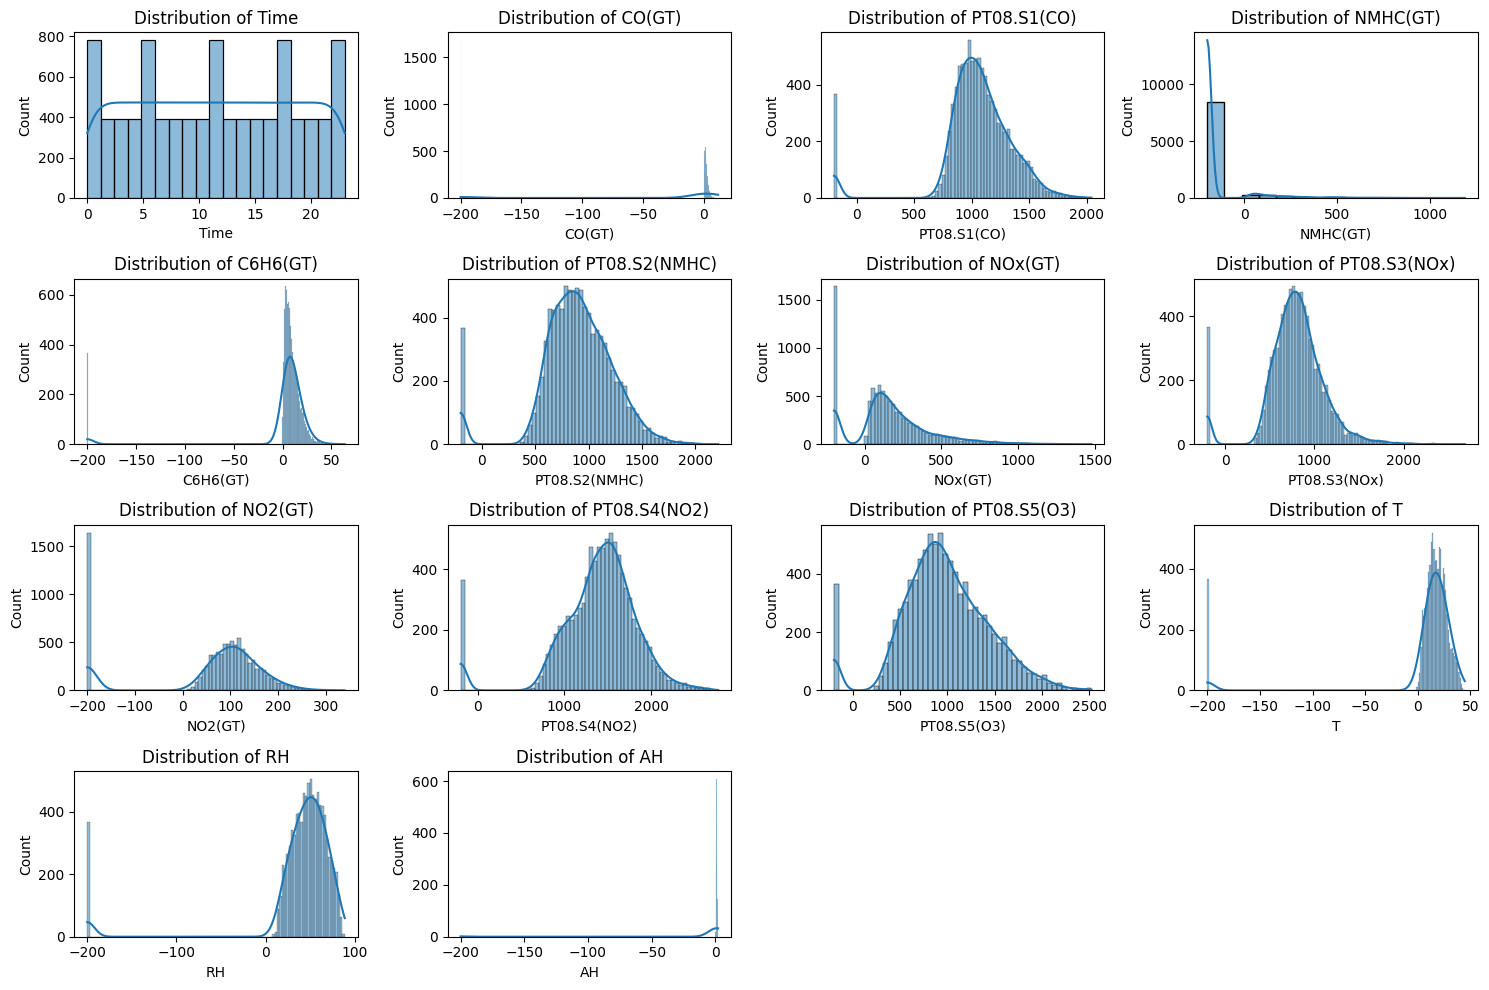

In [8]:
# Visualizations for data insights

# Distribution of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


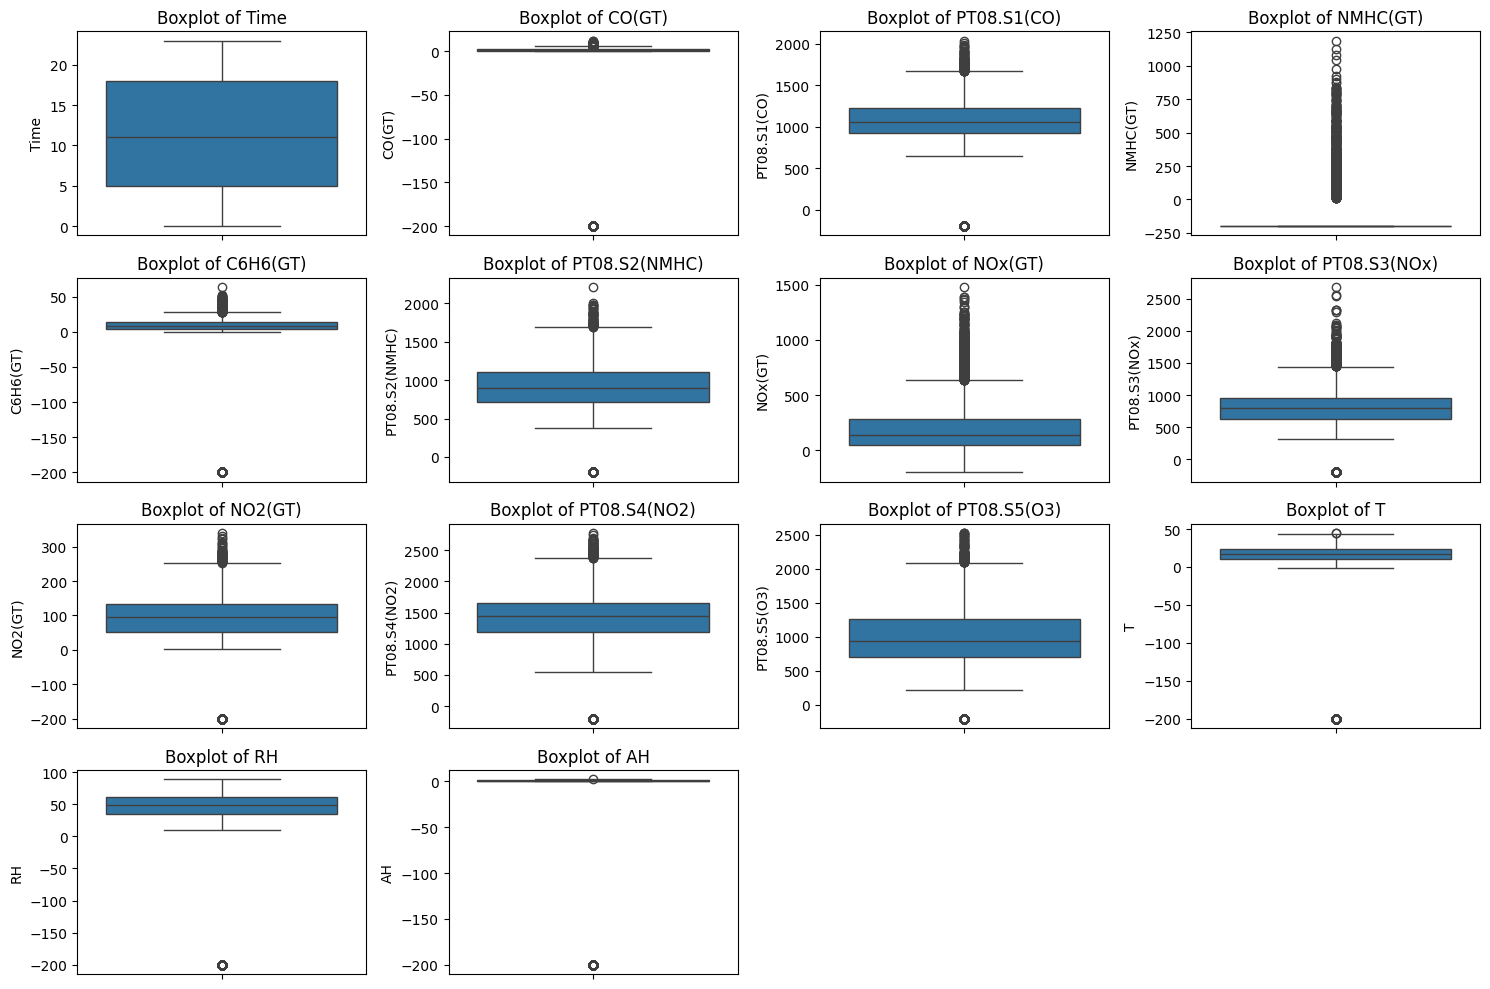

In [9]:

# Boxplots to visualize the distribution of numerical features and identify potential outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
    plt.subplot(4,4, i+1)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()



In [10]:

# Pairplot for relationships between numerical features
sns.pairplot(data.select_dtypes(include=np.number), diag_kind='kde')
plt.show()


Output hidden; open in https://colab.research.google.com to view.

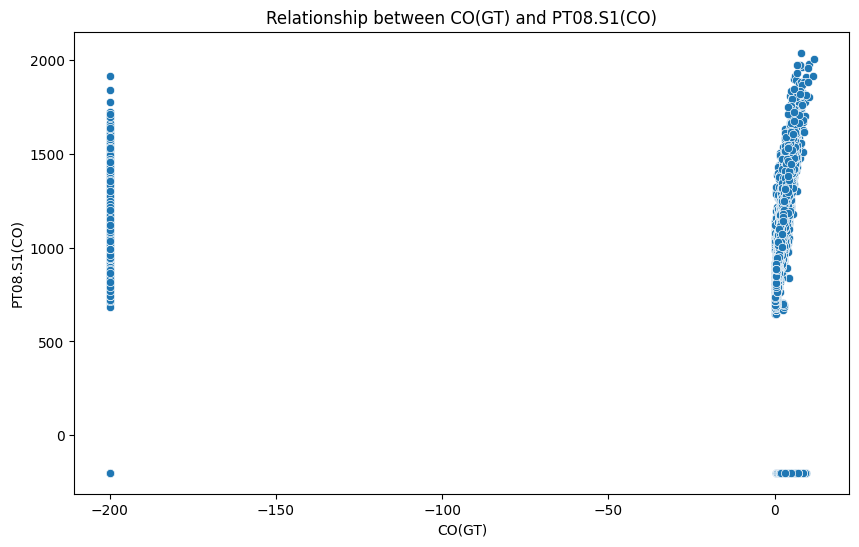

In [11]:

# Scatter plots for specific relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CO(GT)', y='PT08.S1(CO)', data=data)
plt.title('Relationship between CO(GT) and PT08.S1(CO)')
plt.show()


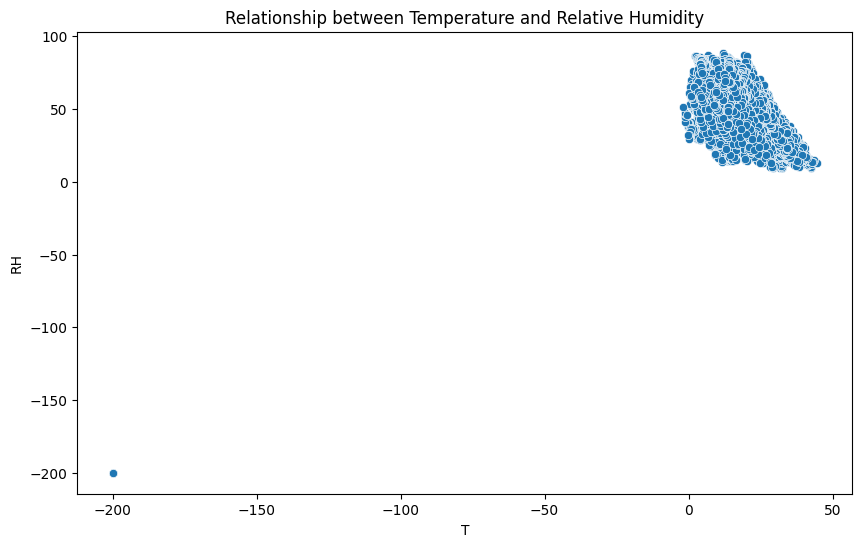

In [12]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='T', y='RH', data=data)
plt.title('Relationship between Temperature and Relative Humidity')
plt.show()


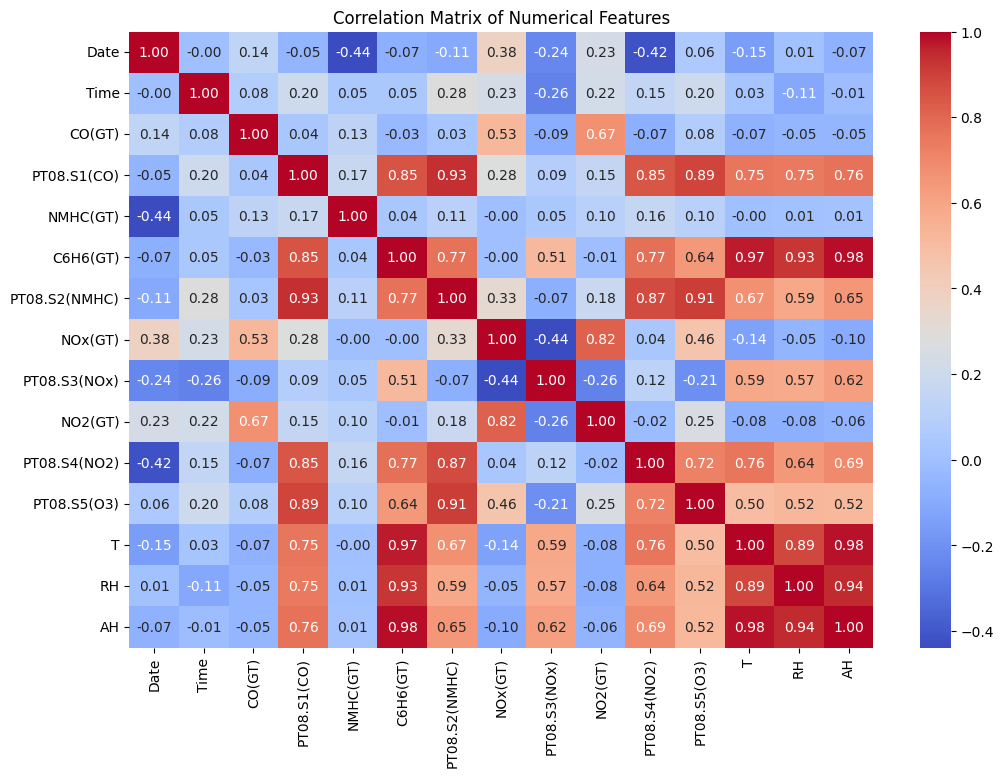

In [13]:

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()



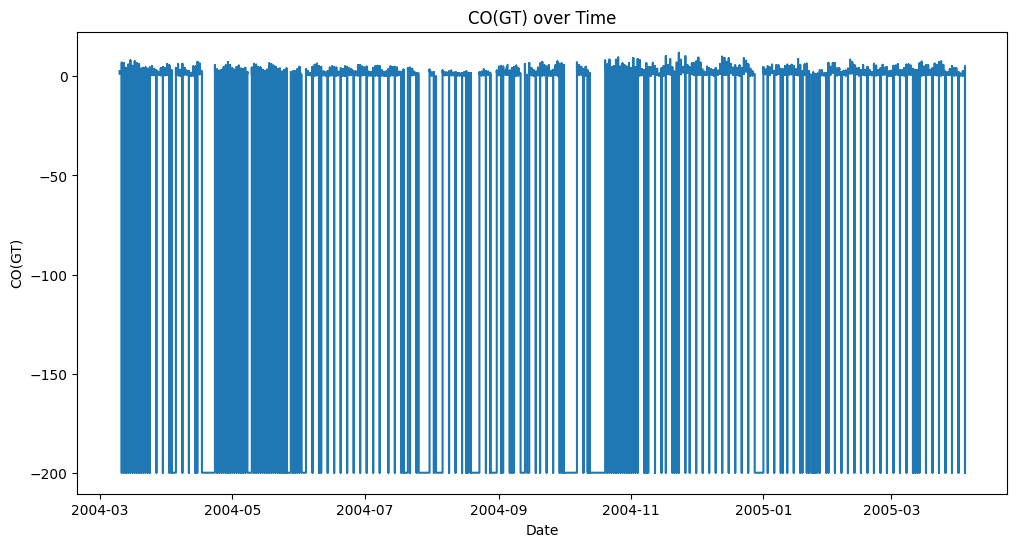

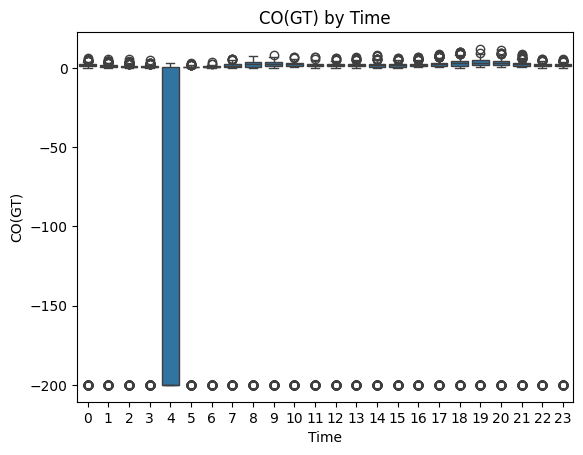

In [14]:
# Time series analysis (if applicable)

if 'Date' in data.columns and pd.api.types.is_datetime64_any_dtype(data['Date']):
    plt.figure(figsize=(12,6))
    plt.plot(data['Date'], data['CO(GT)'])
    plt.xlabel('Date')
    plt.ylabel('CO(GT)')
    plt.title('CO(GT) over Time')
    plt.show()

# Explore relationships with categorical features if any
# Example: if you have a categorical feature 'Category'
sns.boxplot(x='Time', y='CO(GT)', data=data) # Changed 'Category' to 'Time'
plt.title('CO(GT) by Time')
plt.show()

In [15]:
X = data.drop(['CO(GT)','Date'], axis=1)
y = data['CO(GT)']


scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y.values.reshape(-1, 1))

joblib.dump(scaler_X, 'scaler_X.joblib')
joblib.dump(scaler_y, 'scaler_y.joblib')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
regression_algorithms = {
    "Multiple_Linear_Regression": {
        "model": LinearRegression(fit_intercept=True, n_jobs=None)
    },

    "Polynomial_Regression": {
        "model":  LinearRegression(fit_intercept=True, n_jobs=None),
        "poly": PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
    },

    "Ridge_Regression": {
        "model": Ridge(alpha=1.0, fit_intercept=True, max_iter=None,
                      tol=1e-3, solver='auto')
    },

    "Lasso_Regression": {
        "model": Lasso(alpha=0.01, fit_intercept=True, max_iter=1000,
                      tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Elastic_Net_Regression": {
        "model": ElasticNet(alpha=0.01, l1_ratio=0.5, fit_intercept=True,
                           max_iter=1000, tol=1e-4, warm_start=False, selection='cyclic')
    },

    "Decision_Tree_Regression": {
        "model": DecisionTreeRegressor(criterion="squared_error", splitter="best", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=1,
                                     max_features=None, random_state=42)
    },

    "Random_Forest_Regression": {
        "model": RandomForestRegressor(n_estimators=200, criterion="squared_error", max_depth=None,
                                     min_samples_split=2, min_samples_leaf=2, bootstrap=True,
                                     n_jobs=-1, random_state=42)
    },

    "ADA_Boost_Regression": {
        "model": AdaBoostRegressor(n_estimators=50, learning_rate=0.1,
                                 loss="linear", random_state=42)
    },

    "Gradient_Boosting_Regression": {
        "model": GradientBoostingRegressor(loss="squared_error", learning_rate=0.1, n_estimators=100,
                                         subsample=0.8, criterion="friedman_mse",
                                         min_samples_split=2, min_samples_leaf=1,
                                         max_depth=5, random_state=42)
    },

    "XGBoost_Regression": {
        "model": xgb.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100,
                                 objective="reg:squarederror", booster="gbtree", gamma=0,
                                 min_child_weight=1, subsample=1, colsample_bytree=1,
                                 reg_alpha=0, reg_lambda=1)
    },

    "K_Nearest_Neighbors_Regression": {
        "model": KNeighborsRegressor(n_neighbors=5, weights="uniform", algorithm="auto",
                                   leaf_size=30, p=2, metric="minkowski", n_jobs=-1)
    },

    "Support_Vector_Regression": {
        "model": SVR(kernel="rbf", degree=3, C=1.0, epsilon=0.1, gamma="scale",
                    tol=1e-3, max_iter=-1)
    },

    "Bayesian_Ridge_Regression": {
        "model": BayesianRidge(max_iter=300, tol=1e-3, alpha_1=1e-6, alpha_2=1e-6,
                              lambda_1=1e-6, lambda_2=1e-6, fit_intercept=True)
    },

    "Neural_Network_Regression": {
        "model": MLPRegressor(hidden_layer_sizes=(100,), activation="relu", solver="adam",
                            alpha=0.0001, batch_size="auto", learning_rate="constant",
                            learning_rate_init=0.001, max_iter=500, random_state=42)
    },

    "Generalized_Additive_Models": {
        "model": LinearGAM(n_splines=10, lam=0.6, max_iter=100, tol=1e-4)
    },

    "Quantile_Regression": {
        "model": QuantileRegressor(quantile=0.5, alpha=0.0, solver="highs-ds",
                                 fit_intercept=True)
    }
}

In [25]:

models_dir = "trained_models"
os.makedirs(models_dir, exist_ok=True)

results = defaultdict(dict)

for name, config in regression_algorithms.items():
    start_time = time.time()
    model = config["model"]

    if name == "Polynomial_Regression":
        poly = config["poly"]
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)
        model.fit(X_train_poly, y_train)
        y_pred = model.predict(X_test_poly)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)

    results[name]["mse"] = mse
    results[name]["r2"] = r2
    results[name]["mae"] = mae
    results[name]["time"] = time.time() - start_time

    # Save the trained model
    model_filename = os.path.join(models_dir, f"{name}.joblib")
    joblib.dump(model, model_filename)

    print(f"Trained and saved {name} model. MSE: {mse}, R2: {r2}, MAE: {mae}, Time: {results[name]['time']:.2f} seconds")

# Save the results to a CSV file
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.to_csv("regression_results.csv")
print("Results saved to regression_results.csv")

Trained and saved Multiple_Linear_Regression model. MSE: 0.47380308649593844, R2: 0.516423459644627, MAE: 0.42989584392355346, Time: 0.02 seconds
Trained and saved Polynomial_Regression model. MSE: 0.40191667832806593, R2: 0.5897927169398557, MAE: 0.36656496902922003, Time: 0.24 seconds
Trained and saved Ridge_Regression model. MSE: 0.47379318292002004, R2: 0.5164335675082443, MAE: 0.4299193602156139, Time: 0.03 seconds
Trained and saved Lasso_Regression model. MSE: 0.47542647218346257, R2: 0.5147665872923569, MAE: 0.4362966785280295, Time: 0.04 seconds
Trained and saved Elastic_Net_Regression model. MSE: 0.4750005164492545, R2: 0.5152013295010163, MAE: 0.43621487422410266, Time: 0.03 seconds
Trained and saved Decision_Tree_Regression model. MSE: 0.5182303837049586, R2: 0.4710797307960771, MAE: 0.20348848781418996, Time: 0.29 seconds
Trained and saved Random_Forest_Regression model. MSE: 0.2721793188693133, R2: 0.7222062558762317, MAE: 0.22898671397508025, Time: 17.15 seconds
Trained a

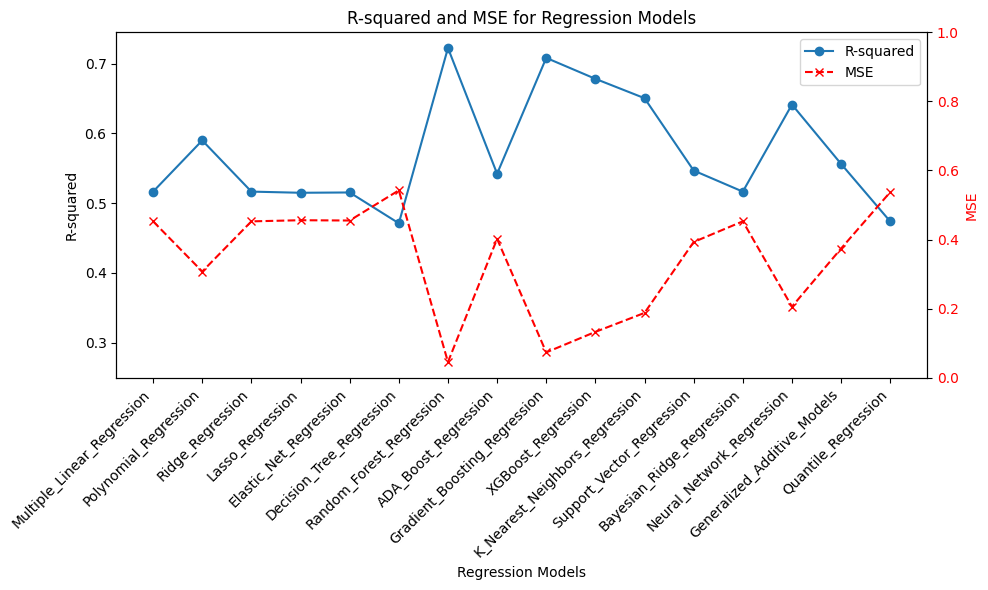

In [26]:

plt.figure(figsize=(10, 6))

# Plot R-squared values
plt.plot(results_df.index, results_df['r2'], marker='o', linestyle='-', label='R-squared')

# Plot MSE values (using a secondary y-axis)
plt.plot(results_df.index, results_df['mse'], marker='x', linestyle='--', color='red', label='MSE')

plt.xlabel("Regression Models")
plt.ylabel("R-squared")
plt.title("R-squared and MSE for Regression Models")
plt.xticks(rotation=45, ha="right")
plt.legend()

# Add a secondary y-axis for MSE
ax2 = plt.gca().twinx()
ax2.set_ylabel("MSE", color="red")
ax2.tick_params(axis='y', labelcolor="red")

plt.tight_layout()
plt.show()

In [36]:
# Load the saved scaler
scaler_X = joblib.load('scaler_X.joblib')
scaler_y = joblib.load('scaler_y.joblib')

# New data record (replace with your actual data)
new_data = pd.DataFrame({
    'PT08.S1(CO)': [1000],
    'NMHC(GT)': [100],
    'C6H6(GT)': [10],
    'PT08.S2(NMHC)': [500],
    'NOx(GT)': [50],
    'PT08.S3(NOx)': [200],
    'NO2(GT)': [20],
    'PT08.S4(NO2)': [100],
    'PT08.S5(O3)': [800],
    'T': [25],
    'RH': [60],
    'AH': [10] ,
    'Time': [12]
})

# Ensure new_data has the same column order as the training data
X = data.drop(['CO(GT)','Date'], axis=1) # Get the column order from original dataframe

#Reindex the columns of new_data to match the training data
new_data = new_data.reindex(columns=X.columns)


# Preprocess the new data using the loaded scaler
new_data_scaled = scaler_X.transform(new_data)


models_dir = "trained_models"
predictions = {}

for filename in os.listdir(models_dir):
    if filename.endswith(".joblib"):
        model_name = filename[:-7]  # Remove the .joblib extension
        model = joblib.load(os.path.join(models_dir, filename))

        if model_name == "Polynomial_Regression":
            poly = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
            new_data_scaled_poly = poly.fit_transform(new_data_scaled)
            prediction = model.predict(new_data_scaled_poly)
        else:
          prediction = model.predict(new_data_scaled)

        # Inverse transform the prediction to the original scale
        prediction = scaler_y.inverse_transform(prediction.reshape(-1, 1)) # Reshape prediction to 2D array
        predictions[model_name] = prediction[0][0]

predictions

{'Elastic_Net_Regression': -37.88507295637025,
 'Ridge_Regression': -33.488980377378994,
 'Neural_Network_Regression': 136.9033031910999,
 'Bayesian_Ridge_Regression': -32.60897619949105,
 'Decision_Tree_Regression': 1.6000000000000014,
 'Support_Vector_Regression': -7.556119227543441,
 'Quantile_Regression': -67.26591986755497,
 'Random_Forest_Regression': -21.653991269841256,
 'Multiple_Linear_Regression': -34.332228459876355,
 'XGBoost_Regression': 37.080563,
 'K_Nearest_Neighbors_Regression': 1.3400000000000034,
 'Generalized_Additive_Models': -87.71360902578405,
 'Lasso_Regression': -41.48691936325897,
 'ADA_Boost_Regression': -21.150927835051576,
 'Polynomial_Regression': -3024.9532049565537,
 'Gradient_Boosting_Regression': 30.086964819962716,
 'Best_Quantile_Regression': -67.26591986755497}